# NLP Project: Scraping GitHub READMEs

In [31]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import acquire

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import prepare as p
import explore as ex

import seaborn as sns
import matplotlib.pyplot as plt

### Wrangle Functions
- Make sure they work

In [2]:
string = ['Hello welcome to Legoland',
          'He is from China but prefers Mexican enchiladas',
          "Peabo hasn't taken a bath in 10 days",
          "I don't recall ever having gone to Europe",
         "Potato thy fine fruit! You are quite the delicious"]

In [3]:
df = pd.DataFrame(data=string, columns=['string'])
df

,string
0,Hello welcome to Legoland
1,He is from China but prefers Mexican enchiladas
2,Peabo hasn't taken a bath in 10 days
3,I don't recall ever having gone to Europe
4,Potato thy fine fruit! You are quite the delic...


In [4]:
p.prepare_nlp_data(df, content = 'string', extra_words=[], exclude_words=[])

,string,clean,stemmed,lemmatized
0,Hello welcome to Legoland,hello welcome legoland,hello welcom legoland,hello welcome legoland
1,He is from China but prefers Mexican enchiladas,china prefers mexican enchiladas,china prefer mexican enchilada,china prefers mexican enchilada
2,Peabo hasn't taken a bath in 10 days,peabo hasnt taken bath 10 days,peabo hasnt taken bath 10 day,peabo hasnt taken bath 10 day
3,I don't recall ever having gone to Europe,dont recall ever gone europe,dont recal ever gone europ,dont recall ever gone europe
4,Potato thy fine fruit! You are quite the delic...,potato thy fine fruit quite delicious,potato thi fine fruit quit delici,potato thy fine fruit quite delicious


In [5]:
# bring it scraped json file
df = pd.read_json('data2.json')

In [6]:
# some chinese repos we need to remove
df.head()

,repo,language,readme_contents
0,codingXiaxw/CustomerManagement,Java,## JavaWeb项目之客户管理系统 \n\n## 项目介绍\n详细讲解请点击这里前往我的...
1,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...
2,Tophold/FinancialCustomerView,Java,## FinancialCustomerView\n* 本项目会对金融交易软件中存在的各种V...
3,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...
4,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...


In [7]:
df.shape

(194, 3)

In [8]:
# do drop unneeded data first then prep
df = p.drop_unneeded_data(df)

In [9]:
df.head()

,repo,language,readme_contents
0,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...
1,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...
2,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...
3,eventuate-tram/eventuate-tram-examples-custome...,Java,# Eventuate Tram Customers and Orders\n\nThis ...
4,Featuretools/predict-customer-churn,Jupyter Notebook,# A Machine Learning Framework with an Applica...


In [55]:
df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=['customer', 'customers', '1', '2'], exclude_words=[])

In [56]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...,manager angularjs custom routing dynamic contr...,manag angularj custom rout dynam control scrip...,manager angularjs custom routing dynamic contr...
1,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...,manager angularjs youre new angularjs check an...,manag angularj your new angularj check angular...,manager angularjs youre new angularjs check an...
2,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...,rest based microservices sample three spring b...,rest base microservic sampl three spring boot ...,rest based microservices sample three spring b...
3,eventuate-tram/eventuate-tram-examples-custome...,Java,# Eventuate Tram Customers and Orders\n\nThis ...,eventuate tram orders application demonstrates...,eventu tram order applic demonstr two key patt...,eventuate tram order application demonstrates ...
4,Featuretools/predict-customer-churn,Jupyter Notebook,# A Machine Learning Framework with an Applica...,machine learning framework application predict...,machin learn framework applic predict churn im...,machine learning framework application predict...


In [57]:
train, validate, test = p.split_data(df)

train---> (58, 6)
validate---> (26, 6)
test---> (22, 6)


In [73]:
train.language.unique()

array(['Java', 'PHP', 'Jupyter Notebook', 'JavaScript'], dtype=object)

In [58]:
# create separate dfs for the top languages
all_word_counts = ex.get_word_counts_series(train, 'stemmed')
java_word_counts = ex.get_word_counts_series(train[train.language == 'Java'], 'stemmed')
javascript_word_counts = ex.get_word_counts_series(train[train.language == 'JavaScript'], 'stemmed')
php_word_counts = ex.get_word_counts_series(train[train.language == 'PHP'], 'stemmed')
jupyter_word_counts = ex.get_word_counts_series(train[train.language == 'Jupyter Notebook'], 'stemmed')

In [74]:
words_counts = [java_word_counts, php_word_counts, jupyter_word_counts, javascript_word_counts, all_word_counts]
cols = list(df.language.unique())
cols.append('all')

langs = list(df.language.unique())

In [75]:
words_counts = pd.concat(words_counts, axis=1).fillna(0)
words_counts.columns = cols
words_counts.head()

,JavaScript,Java,Jupyter Notebook,PHP,all
servic,126.0,4.0,20.0,9.0,159
order,116.0,29.0,5.0,4.0,154
use,82.0,74.0,141.0,42.0,339
saga,58.0,0.0,0.0,0.0,58
creat,38.0,35.0,74.0,18.0,165


In [76]:
words_counts.drop(columns='all').columns.tolist()

['JavaScript', 'Java', 'Jupyter Notebook', 'PHP']

<Figure size 1152x648 with 0 Axes>

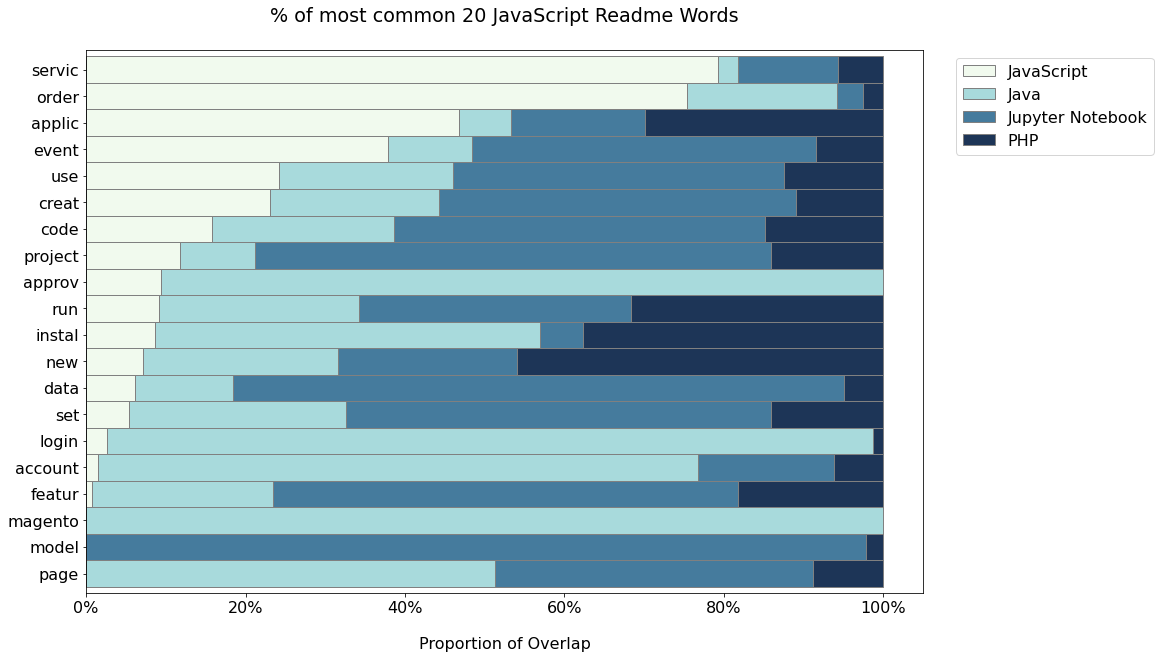

<Figure size 1152x648 with 0 Axes>

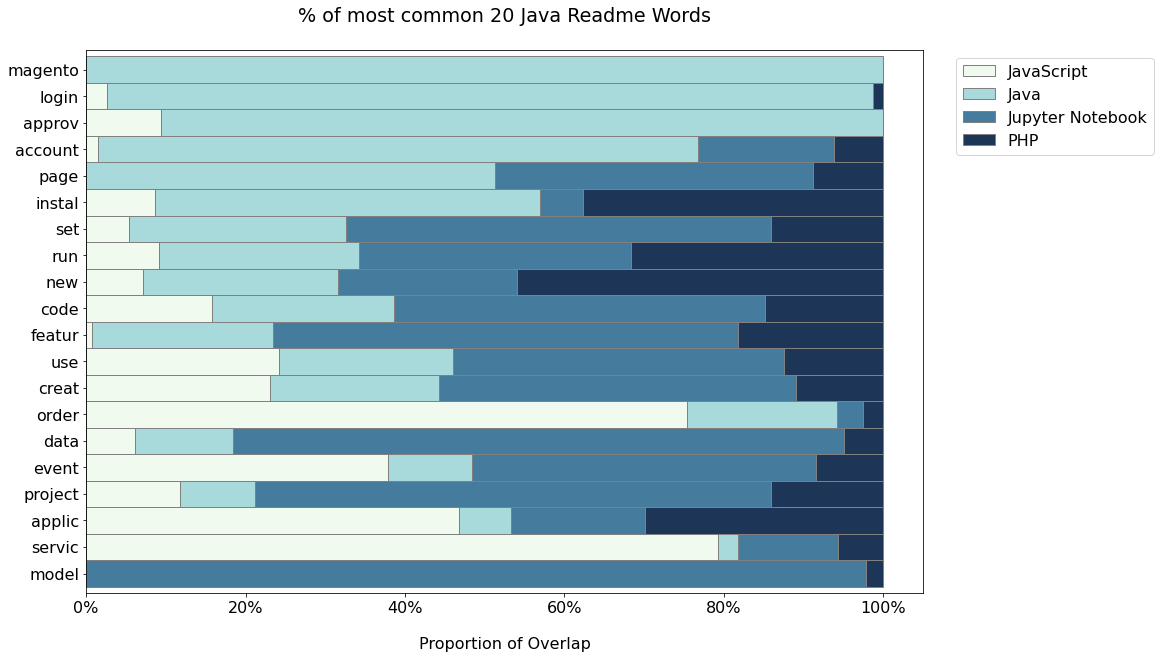

<Figure size 1152x648 with 0 Axes>

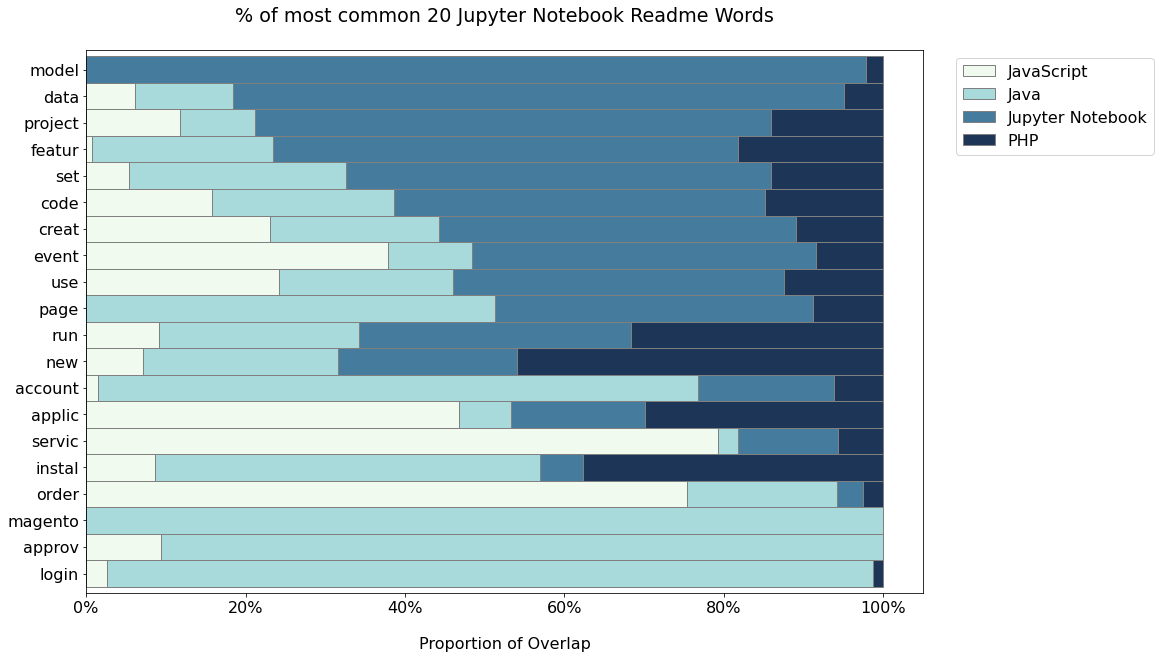

<Figure size 1152x648 with 0 Axes>

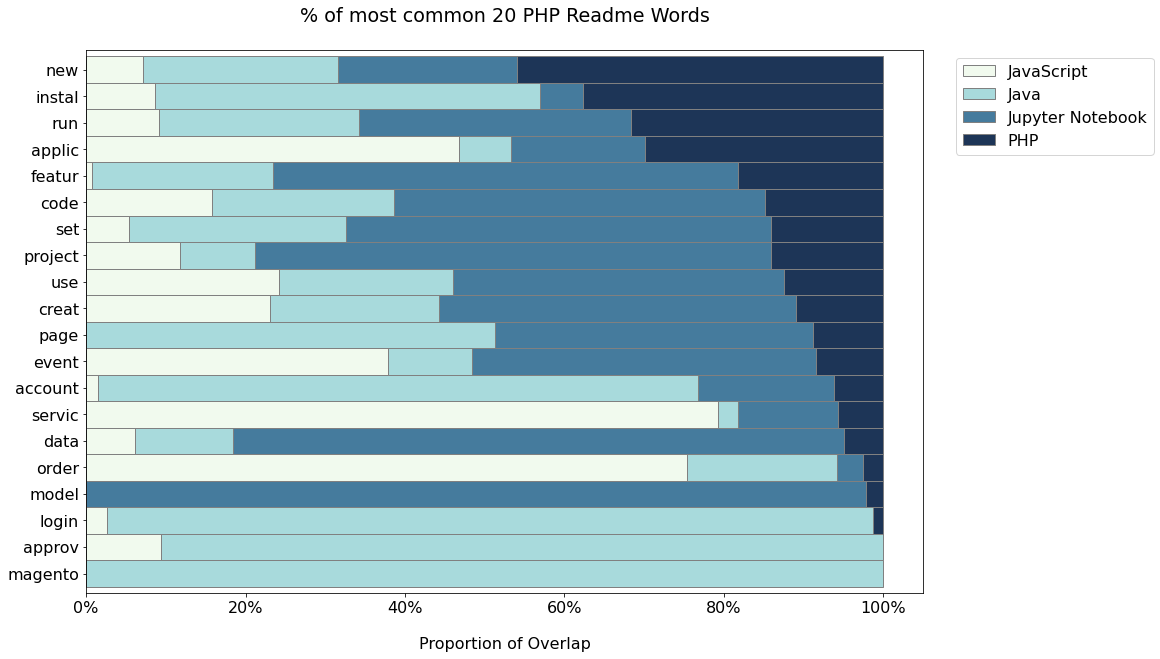

In [77]:
blues = [ '#f1faee', '#a8dadc', '#457b9d', '#1d3557', '#e63946']
for i in words_counts.drop(columns='all').columns.tolist():

    plt.rc('figure',figsize=(15,10))
    ex.plot_overlap_stacked_bar(words_counts, i, num_top = 20, colors = blues);

In [78]:
words_counts

,JavaScript,Java,Jupyter Notebook,PHP,all
servic,126.0,4.0,20.0,9.0,159
order,116.0,29.0,5.0,4.0,154
use,82.0,74.0,141.0,42.0,339
saga,58.0,0.0,0.0,0.0,58
creat,38.0,35.0,74.0,18.0,165
...,...,...,...,...,...
customermanagersln,0.0,0.0,0.0,1.0,1
colorcod,0.0,0.0,0.0,1.0,1
stylebord,0.0,0.0,0.0,1.0,1
cater,0.0,0.0,0.0,1.0,1


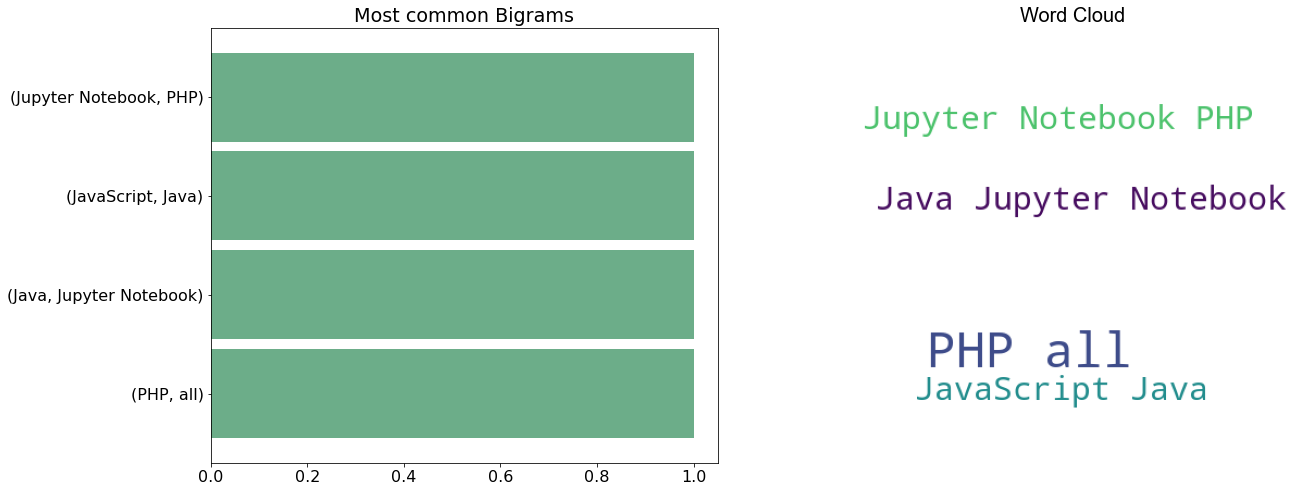

In [79]:
ex.bigram_count_word_cloud(words_counts, top_num = 20)

In [80]:
df.groupby(by='language').language